In [11]:
import numpy as np
from advisoryParams import *
from resultsProcess import *
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

%matplotlib inline
plt.rcParams['figure.dpi']= 130 # Improve inline plot resolution

#from matplotlib2tikz import save as tikz_save # For saving to tikz for LaTex


## Plot heat-map of counter examples

In [12]:
directory = "res_overApprox_dt0.2500_dti0.0625_v1"
adv, inputs, offset = genDictSat(directory)
print(type(inputs[0][0]))

Query not run for Pra: COC, ra: COC
<class 'float'>


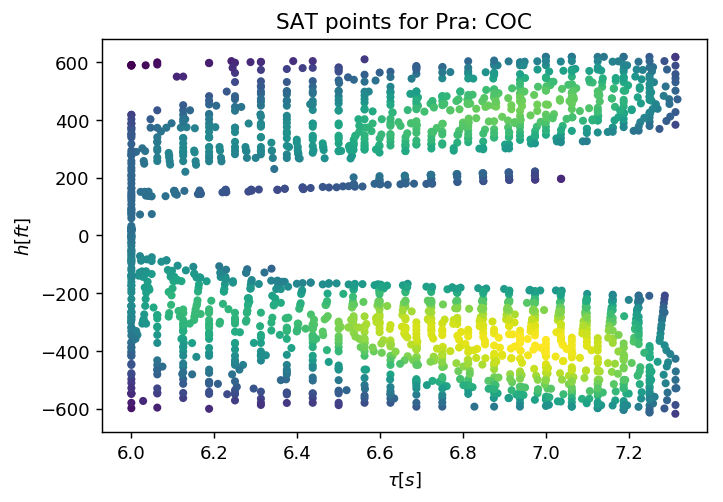

In [13]:
x = []
y = []
for i in inputs:
    x.append(i[1])
    y.append(i[0])

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=20, edgecolor='')
plt.xlabel(r'$ \tau [s]$')
plt.ylabel('$h [ft] $')
plt.title('SAT points for Pra: COC')
plt.show()

## Plot Convergence

Queries for underApprox dt = 0.125:  14472
Queries for overApprox dt  = 0.125:  14216
Queries for underApprox dt = 0.250:  14724
Queries for overApprox dt  = 0.250:  14216
Queries for underApprox dt = 0.500:  15223
Queries for overApprox dt  = 0.500:  14216
Queries for underApprox dt = 1.000:  16079
Queries for overApprox dt  = 1.000:  14216
Queries for underApprox dt = 2.000:  17276
Queries for overApprox dt  = 2.000:  14216


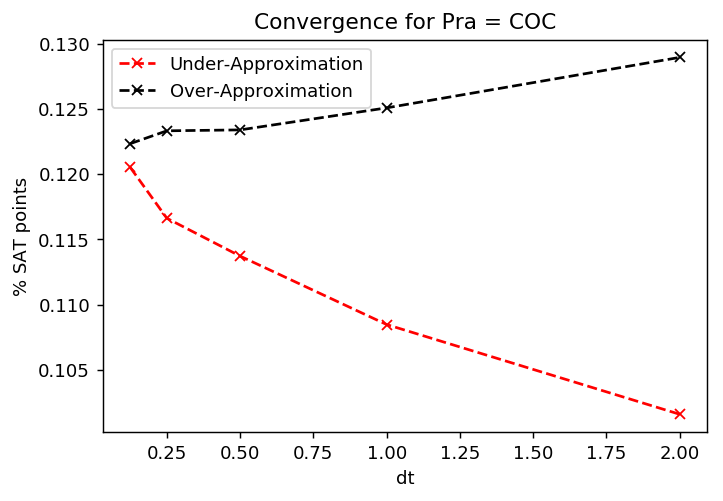

In [23]:
dts    = [0.125, 0.250, 0.500, 1.000, 2.000] # dt's for which the experiment was run
under  = []
over   = []
num    = []
dti    = 0.0625
 
for dt in dts: 
    f_over = "res_overApprox_dt%.3f_dti0.0625_v2"%dt    # UnderApproximation directory
    f_under= "res_underApprox_dt%.3f_dti0.0625_v2"%dt   # OverApproximation directory
    under += [totalSat(f_under)/totalNum(f_under)]
    over  += [totalSat(f_over)/totalNum(f_over)]
    num   += [int(dt/dti)]
    print("Queries for underApprox dt = %.3f: "%dt, totalNum(f_under))
    print("Queries for overApprox dt  = %.3f: "%dt, totalNum(f_over))
    
    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(dts, under, 'rx--', label="Under-Approximation")
ax.plot(dts, over, 'kx--', label="Over-Approximation")
plt.autoscale(enable=True, axis='both')

plt.xlabel('dt')
plt.ylabel('% SAT points')
plt.title('Convergence for Pra = COC')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels);